In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Reading the image

In [89]:
img = cv2.imread('monalisa.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

Displaying the image

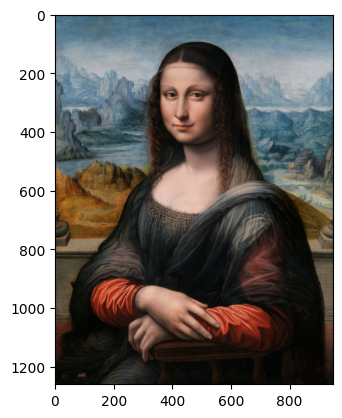

In [97]:
plt.imshow(img)

In [91]:
xs = (16,16)
s = (24,24)
m = (32,32)
l = (48,48) 
xl = (64,64)
sizes = [xs, s, m, l, xl]

Különböző interpolációs technikák vannak arra, hogy egy képet kisebbé tegyünk.
Ugye a probléma az, hogy egy nagy képhez képest a kisebb képben kevesebb pixel van. Ezért 
a nagy képe pixeleit össze kell sűrítenünk. 

Erre különböző technikák vannak. Minden pixelhez a kimeneti képen hozzá tudunk rendelni egy pozíciót a bemeneti képen. Ez alapján a pozíció alapján pedig tudunk interpolálni.

1. NEAREST: Megnézi, hogy melyik pixel van a legközelebb a kalkulált pozícióhoz.
2. LINEAR: Bilineáris interpolációt végez a körölütte lévő pixelekhez képest.
3. BILINEAR: Binégyzetes (?) interpolációt végez a körölütte lévő pixelekhez képest.
4. AREA: Minden pixelhez hozzárendel egy területet, majd minden pixelnek a súlyozott átlagát veszi. 
5. LANCZOS4: A lánczos interpolációnak az alapja egy másik fajta interpolációs függvény, nevezetesen a sinx/x, ami így néz ki. A 4-es szám pedig a területre utal amin interpolálunk, egy -4 és +4 között mindkét irányba terjedő négyzet, ami összesen így 64. 


<img src="sinc.png" alt="" width="500"/>



In [100]:
def compare_image_resizing(img, sizes):
    interpolations = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_AREA, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]
    interpolation_names = ['NEAREST', 'LINEAR', 'AREA', 'CUBIC', 'LANCZOS4']

    fig, axs = plt.subplots(len(interpolations), len(sizes), figsize=(20, 25))
    fig.suptitle('Interpolation Methods vs Image Sizes', fontsize=16)

    resized_images = {}

    for i, interpolationMethod in enumerate(interpolations):
        method_images = []
        
        for j, size in enumerate(sizes):
            resized = cv2.resize(img, size, interpolation=interpolationMethod)
            axs[i, j].imshow(resized)
            axs[i, j].axis('off')

            method_images.append(resized)
                
            if i == 0:
                axs[i, j].set_title(f'{size[0]}x{size[1]}', fontsize=12)

        resized_images[interpolationMethod] = method_images
         
    for i, name in enumerate(interpolation_names):
        fig.text(0.07, 0.9 - (i * 0.18), name, va='center', ha='right', fontsize=12, rotation='vertical')

    plt.tight_layout(rect=[0.1, 0, 1, 0.96]) 
    plt.show()

    return resized_images

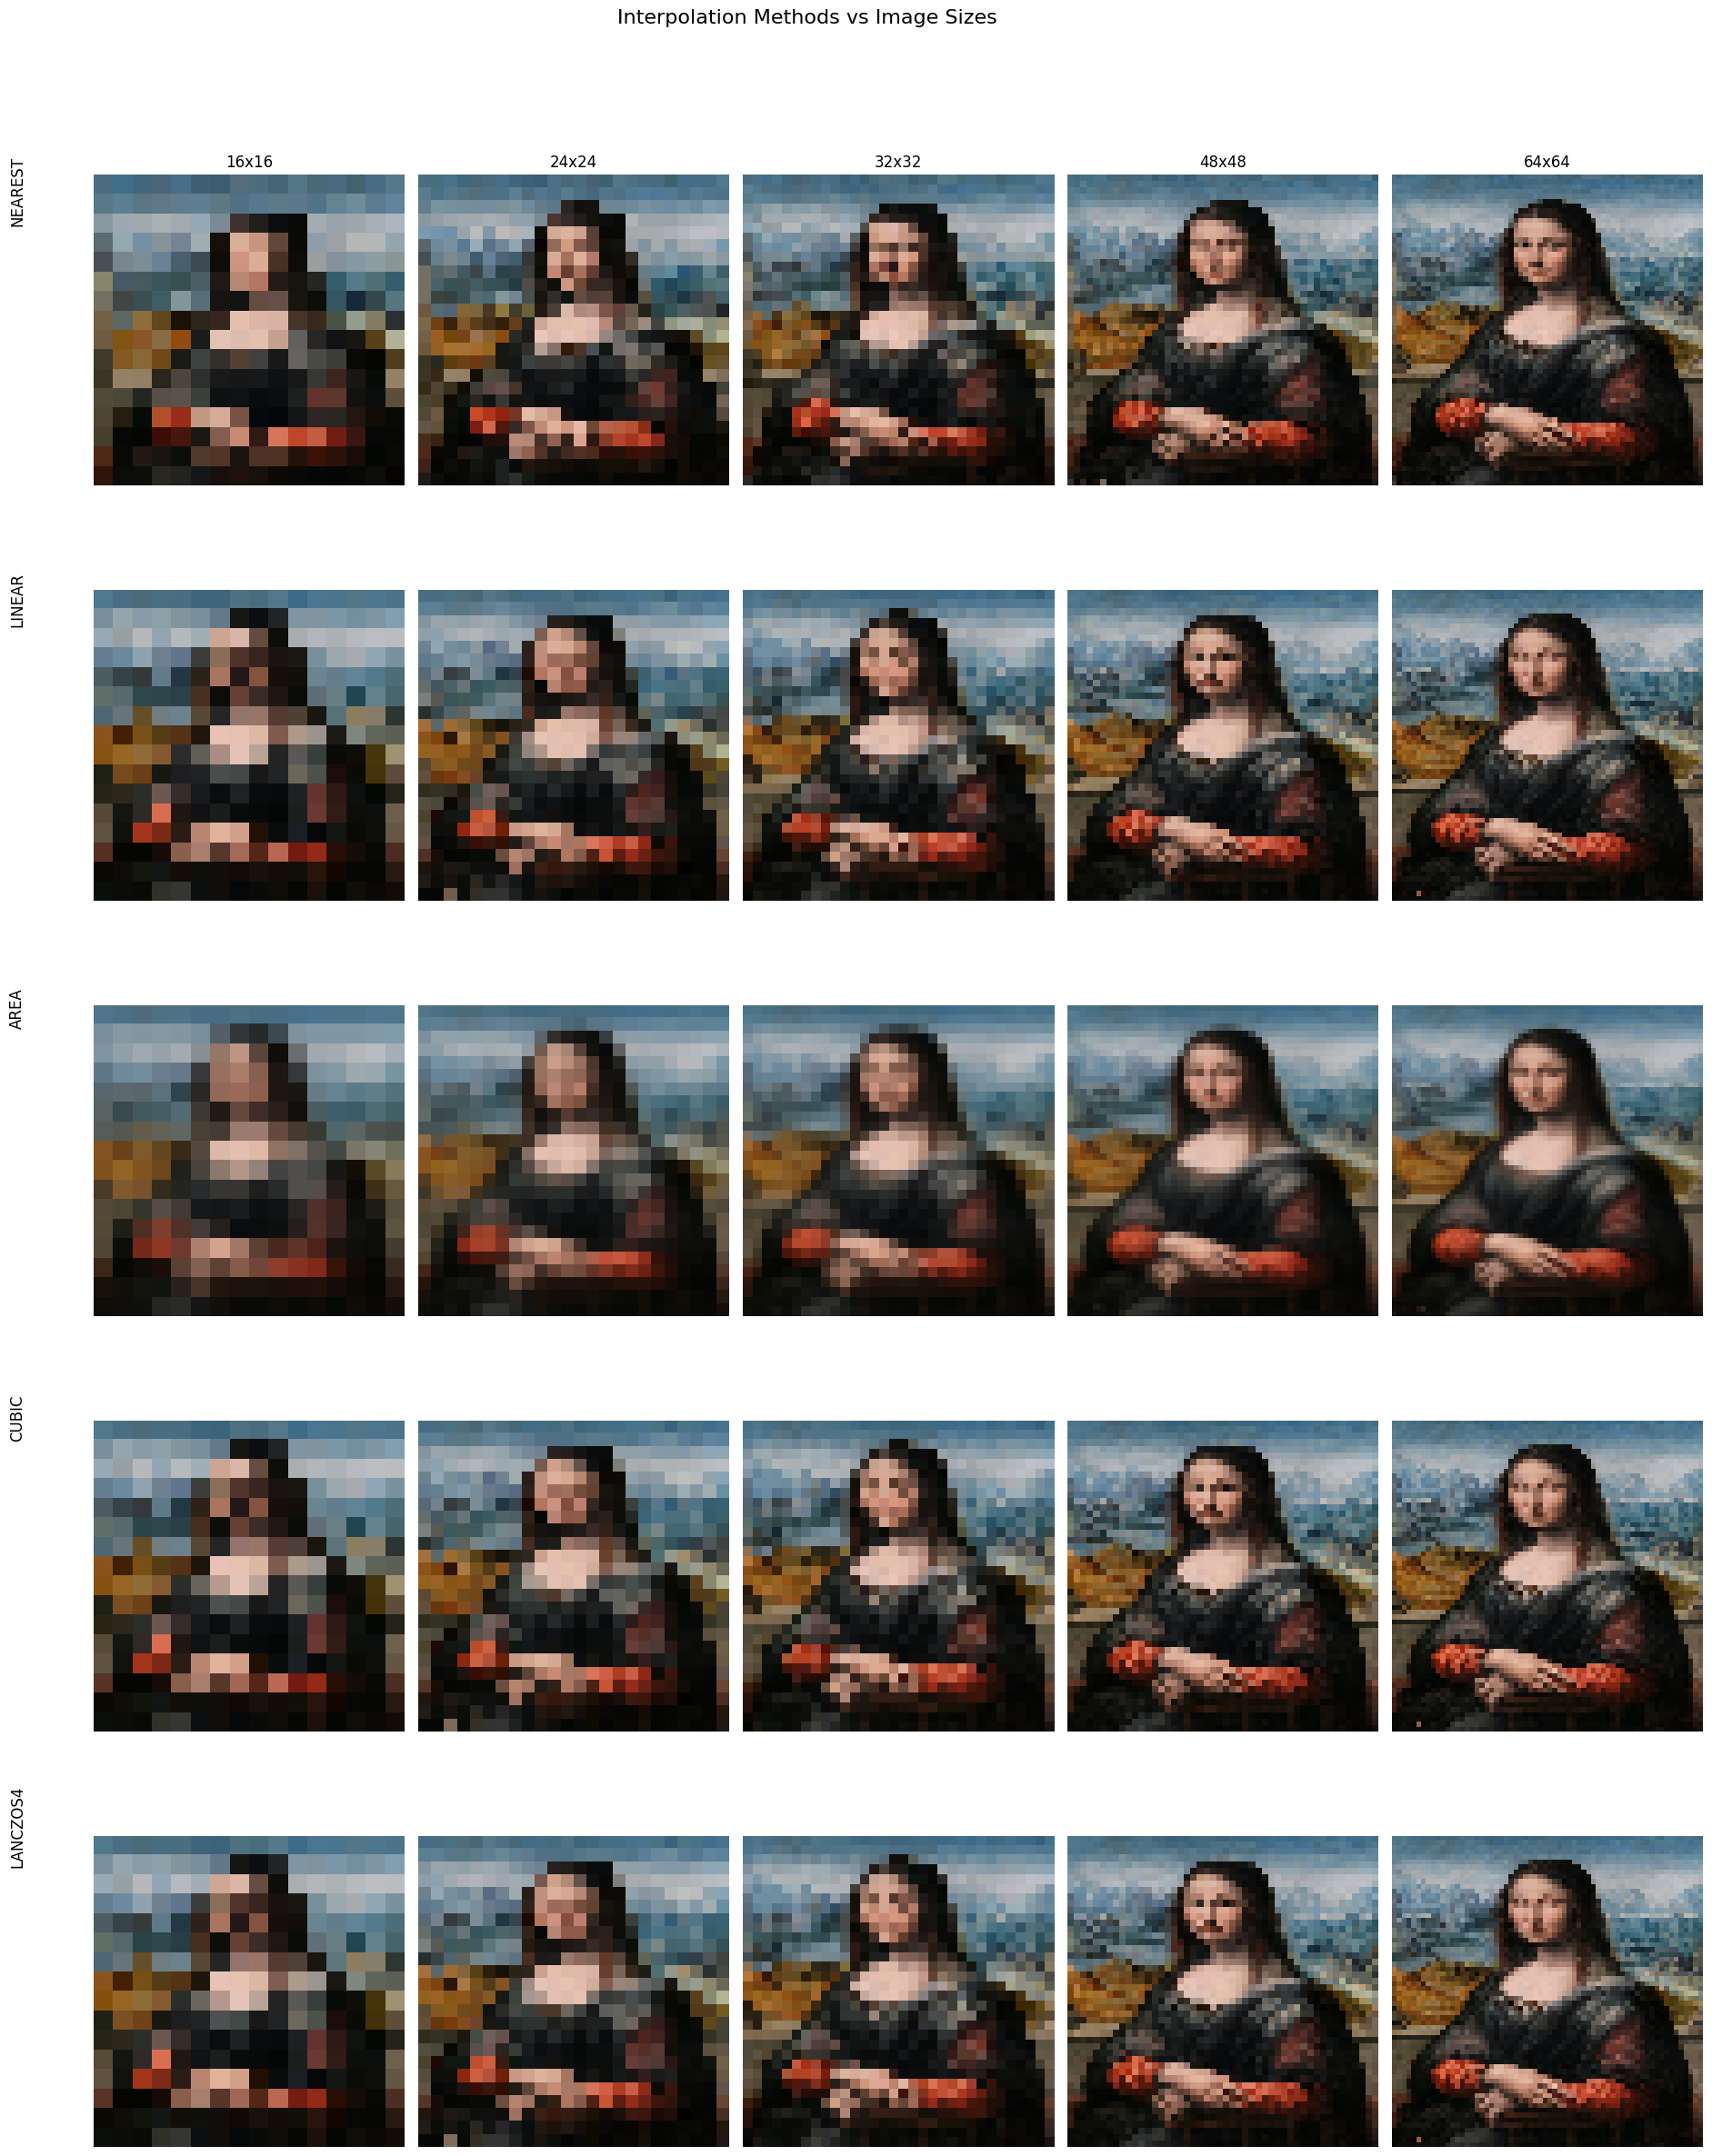

In [101]:
resized_images = compare_image_resizing(img, sizes)



In [102]:
def change_bit_depth(image, new_depth):
    new_depth = max(1, min(8, new_depth))
    
    levels = 2**new_depth
    
    scaled = np.round(image.astype(float) / 255.0 *  (levels - 1))

    reduced = (scaled * 255 / (levels - 1)).astype(np.uint8)
    
    return reduced

Most kipróbálom a különböző bit mélységeket

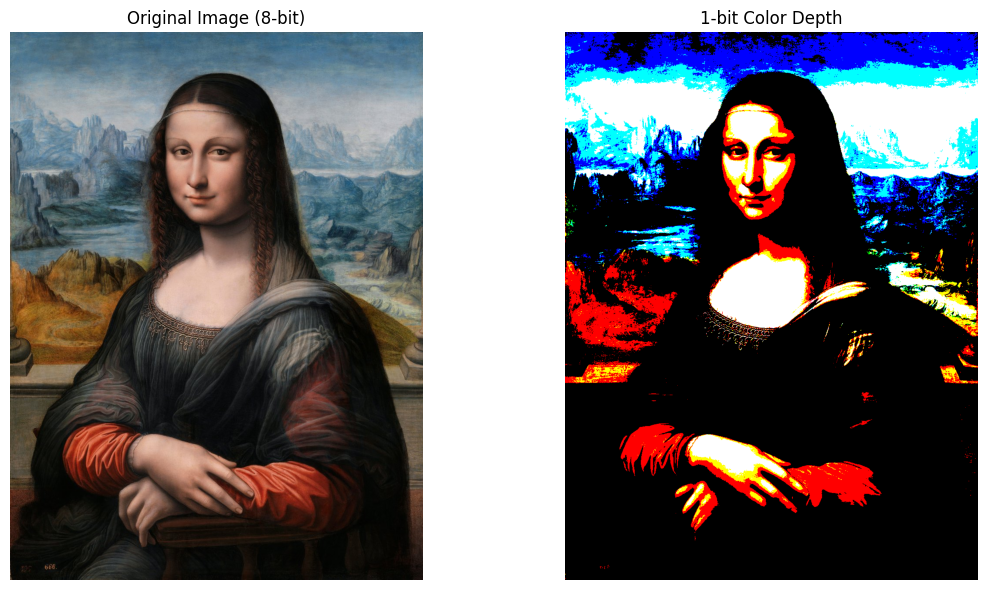

In [104]:
new_bit_depth = 1 ;

img_1bit = change_bit_depth(img, new_bit_depth)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(img)
ax1.set_title('Original Image (8-bit)')
ax1.axis('off')

ax2.imshow(img_1bit, cmap='binary')
ax2.set_title(f'{new_bit_depth}-bit Color Depth')
ax2.axis('off')

plt.tight_layout()
plt.show()

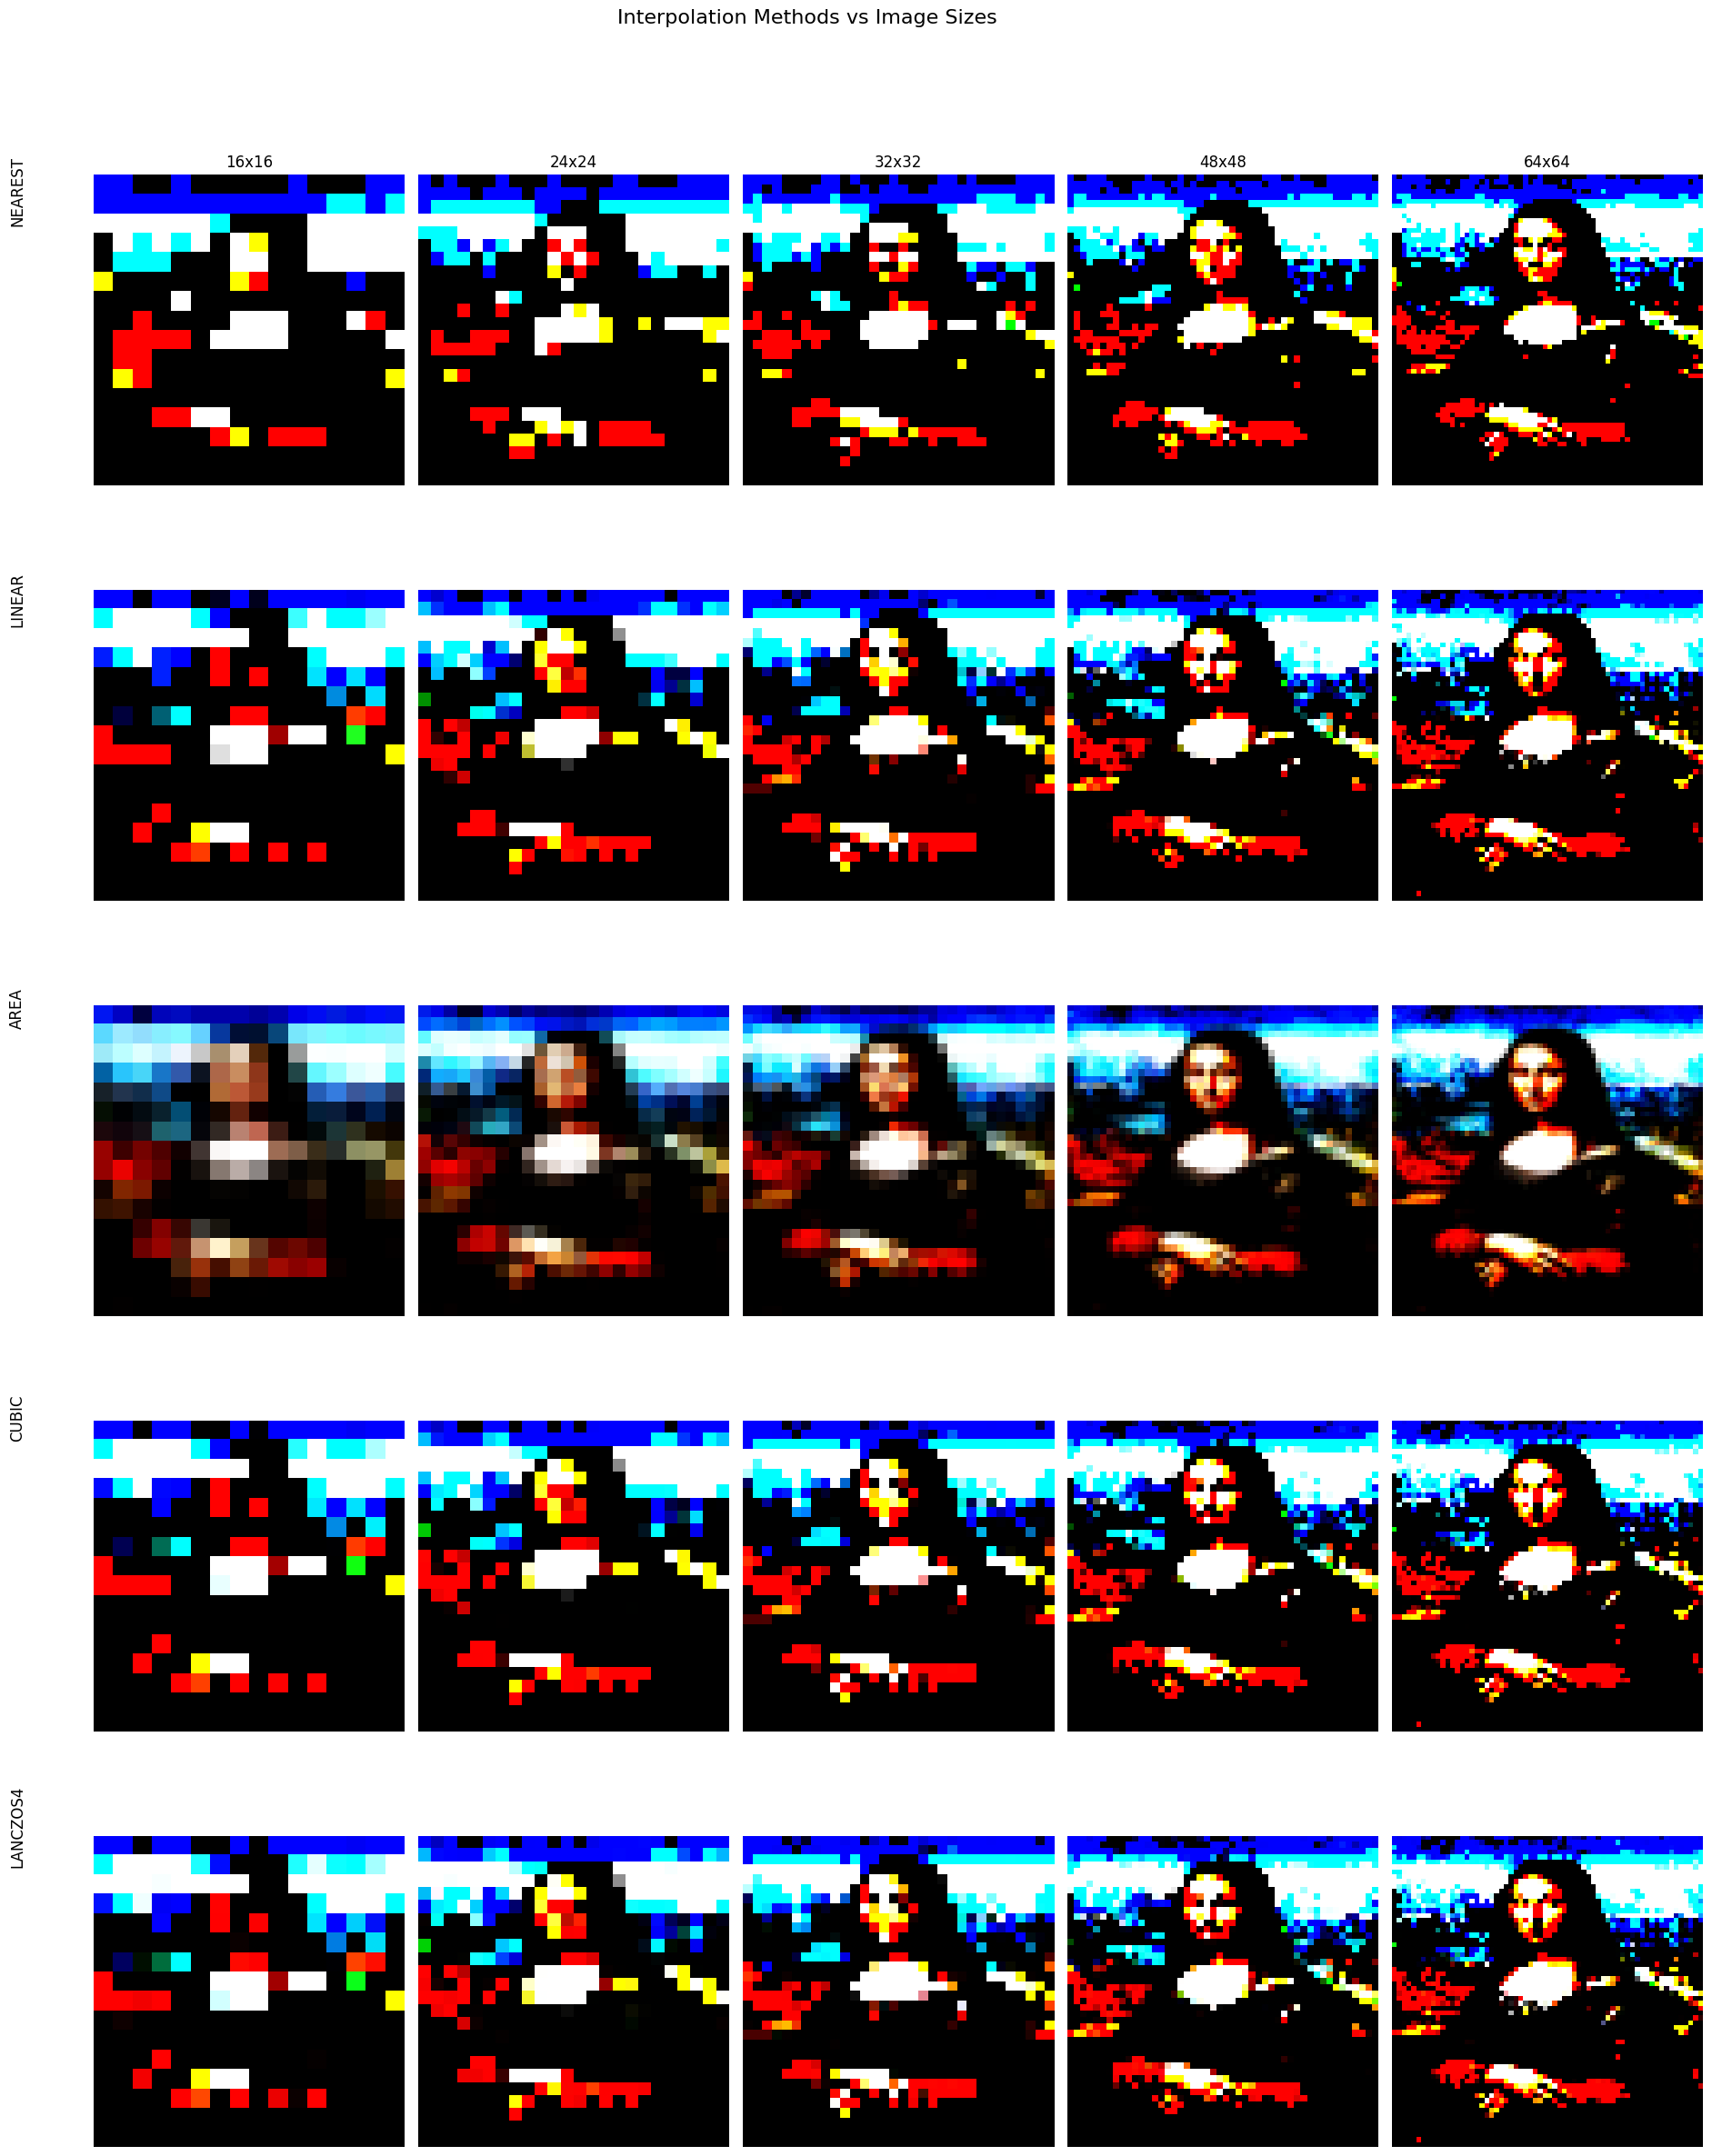

In [96]:
resitzed_images_1bit = compare_image_resizing(img_1bit, sizes)